In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

In [145]:
iris = pd.read_csv('/content/iris.data.csv')

# Splitting the data into features and labels
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]


In [146]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [147]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [148]:
print(iris.columns)

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')


In [149]:
# Rename multiple columns
iris = iris.rename(columns={'5.1': 'sepal_length', '3.5': 'sepal_width', '1.4':'petal_length', '0.2': 'petal_width','Iris-setosa':'species'})
print(iris)

     sepal_length  sepal_width  petal_length  petal_width         species
0             4.9          3.0           1.4          0.2     Iris-setosa
1             4.7          3.2           1.3          0.2     Iris-setosa
2             4.6          3.1           1.5          0.2     Iris-setosa
3             5.0          3.6           1.4          0.2     Iris-setosa
4             5.4          3.9           1.7          0.4     Iris-setosa
..            ...          ...           ...          ...             ...
144           6.7          3.0           5.2          2.3  Iris-virginica
145           6.3          2.5           5.0          1.9  Iris-virginica
146           6.5          3.0           5.2          2.0  Iris-virginica
147           6.2          3.4           5.4          2.3  Iris-virginica
148           5.9          3.0           5.1          1.8  Iris-virginica

[149 rows x 5 columns]


In [150]:
iris["species"].value_counts()

species
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64

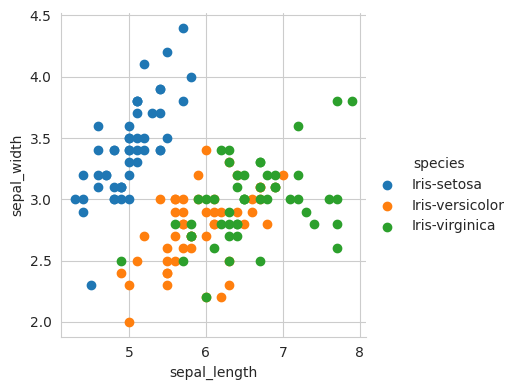

In [151]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue="species", height=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()
plt.show()

In [152]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [153]:
iris.shape

(149, 5)

In [154]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [155]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



In [157]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [158]:
y_test.shape

(38,)

In [159]:
# Making predictions on the test set

y_pred = clf.predict(X_test)

In [160]:
# Evaluating the classifier accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9473684210526315
